# Practical session 2 - Practise with classic libraries

Students (pair):
- [Farouk Moahmed]([link](https://github.com/FaroukM21))
- [Thomas Guyon]([link](https://github.com/Giblys))

```
conda create --name=lab2 --file=requirement.txt
conda activate lab2
# do not forget to deactivate the environment if needed
# you can remove the environment once you are done
conda env remove --name=lab2
```

**Useful references for this lab**:

[1] `numpy`: [lecture notes (1.4.1-1.4.2)](https://scipy-lectures.org/intro/numpy/index.html) and [documentation](https://numpy.org/doc/stable/)

[2] `pandas`: [documentation](https://pandas.pydata.org/docs/getting_started/index.html), [quick tutorial](https://pandas.pydata.org/pandas-docs/version/0.15/10min.html)

[3] `matplotlib`: [lecture notes (1.5)](https://scipy-lectures.org/intro/matplotlib/index.html) and [documentation](https://matplotlib.org/)

[4] `h5py`: [quick start guide](http://docs.h5py.org/en/stable/quick.html#quick)

## <a name="content">Contents</a>
- [Exercise 1: Computing basic statistics](#ex1)
- [Exercise 2: Random variables and histograms](#ex2)
- [Exercise 3: Discrete isotropic total variation](#ex3)
---

In [1]:
%load_ext autoreload
%autoreload 2

---
## <a name="ex1">Exercise 1: Random variables and histograms</a>

In this exercise, we are interested in generating samples from the Gamma distribution $\mathcal{G}(\alpha,\beta)$, of probability density function (pdf)

\begin{equation}
    p(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x) \mathbb{1}_{\mathbb{R}_+^*}(x),
\end{equation}

and displaying their histogram. In the following, we consider $(\alpha, \beta) = (9, 2)$.

1\. Set the random seed to a fixed value for reproducibility, and biefly check your instruction works as intended.
> Hint: you may take a look at the following pages: [random module](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random), [random generator](https://numpy.org/doc/stable/reference/random/generator.html).

**Answer**:

In [112]:
import random as r
import numpy as np
import h5py
import math as m

In [30]:
r.seed(10)

2\. Generate $\approx 10^5$ samples in a vector. Save the vector in a file, `samples.hdf5` or `samples.npy`.
> Warning / hint: 
> - take a careful look at the [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html?highlight=gamma#numpy.random.gamma) (multiple conventions exist for the definition of the pdf underlying the distribution...);
> - to save data in a `npy` file, take a look at the example reported in the [Numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.save.html);
> - to save data in a `.h5` file, take a quick look at the [documentation here](https://docs.h5py.org/en/stable/quick.html#quick).

**Answer**:

In [134]:
beta=2
alpha=9
def f(x):
    return beta**alpha/m.gamma(alpha)*x**(alpha-1)*m.exp(-beta*x)

In [136]:
X = np.array([ r.random() for _ in range(int(1e5))])
X = np.random.gamma(alpha,1/beta,int(1e5))
P=[ f(X[i]) for i in range(len(X))]
np.save('samples.npy',X)

3\. Estimate an histogram of this distribution for a well chosen set of bins, and display it.
> Warnings: 
> - make sure the [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) corresponds to a probability density function (pdf);
> - do not forget to include a proper title with names for the axes.

**Answer**:

In [60]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histogram of a gamma density random variable')

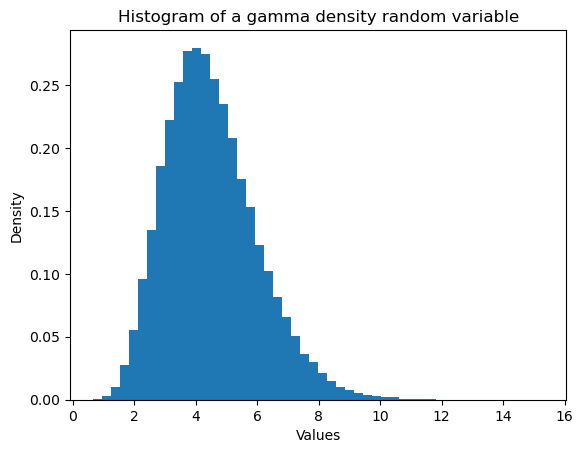

In [142]:
fig=plt.figure()
plt.hist(X,bins=50,density=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram of a gamma density random variable')

4\. Overlay the probability density function on the histogram and compare these in a few words. Save the resulting picture in `.png` format.
> Hint: 
> - take a look at the `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to avoid implementing the pdf from scratch;
> - return the bins in which the histogram is computed, and evaluate the pdf on those points.

**Answer**:

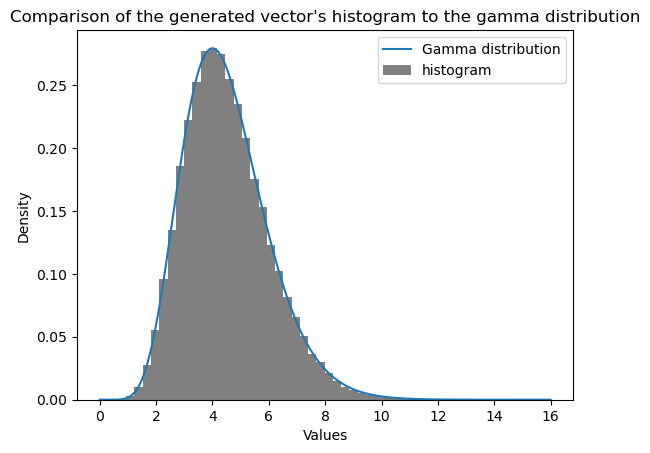

In [214]:
x=np.linspace(0,16,int(1e5))
d=np.array([f(x[i]) for i in range(len(x))])
fig=plt.figure()
plt.plot(x,d,label='Gamma distribution')
plt.hist(X,bins=50,density=True,color='grey',label='histogram')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title("Comparison of the generated vector's histogram to the gamma distribution")
plt.legend(loc='upper right')

---
## <a name="ex2">Exercise 2: Basic statistics with `pandas`</a>

In this second exercise, we focus on computing basic statistics, and applying linear regression to a small data set. These data are gathered in the following table, which gives the infant mortality (`X`) and the gross national product per inhabitant (`Y`) of 12 european countries :

| `X` | 190 | 128 | 180 | 212 | 56 | 192 | 68 | 98 | 110 | 197 | 181 | 233 |
|-----|-----|-----|-----|----|-----|----|----|-----|-----|-----|-----|-----|
| `Y` |  24 |  28 |  24 | 19 |  37 | 22 | 34 |  25 |  36 |  24 |  20 |  18 |

1\. For `X `and `Y`, compute the median, mean, variance and standard deviation. The data points have already been entered into a `.csv` file stored in `data/data.csv`.
> Hint: 
> - you can directly use `pandas` to load the data into a `DataFrame` ([`pd.read_csv`](https://pandas.pydata.org/docs/reference/frame.html));
> - take a look at the built-in operations available for `DataFrame` objects ([documentation](https://pandas.pydata.org/docs/reference/frame.html));
> - to display a `DataFrame` `f`:
> ```python 
> from IPython.display import display
> display(df)
> ```
> - sort the `DataFrame` with respect to the value of `X` (see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)) This will be useful for question 3.

**Answer**:

In [154]:
import pandas as pd

In [156]:
df = pd.read_csv('data/data.csv')
df

,X,Y
0,190,24
1,128,28
2,180,24
3,212,19
4,56,37
5,192,22
6,68,34
7,98,25
8,110,36
9,197,24


In [184]:
mX = df.X.mean()
mY = df.Y.mean()
medX=df.X.median()
medY=df.Y.median()
vX = df.X.var()
vY = df.Y.var()
stdX=m.sqrt(vX)
stdY=m.sqrt(vY)
print(f"X's mean:{mX:.3f} median:{medX:3f} variance:{vX:3f} and std: {stdX:3f} \n")
print(f"Y's mean:{mY:.3f} median:{medY:3f} variance:{vY:3f} and std: {stdY:3f} \n")

X's mean:153.750 median:180.500000 variance:3486.022727 and std: 59.042550 

Y's mean:25.917 median:24.000000 variance:42.446970 and std: 6.515134 



In [190]:
df=df.sort_values('X')

2\. Give the equation of the regression line of `Y` as a function of `X`.
> Hint: 
> - take a look at the functionalities available in `numpy` (e.g., `np.polyfit` and `np.polyval`);
> - if needed, note that you can retrieve the data from the resulting `pandas` `DataFrame` with the `to_numpy()` method.

**Answer**:

In [196]:
p = np.polyfit(list(df.X),list(df.Y),1)
p

array([-0.09816475, 41.0094968 ])

In [198]:
Z=np.polyval(p,np.array(df.X))
Z

array([35.51227087, 34.33429388, 31.38935141, 30.21137443, 28.44440895,
       23.33984201, 23.24167726, 22.35819452, 22.16186502, 21.67104128,
       20.19857005, 18.13711032])

3\. Display the cloud of points and the regression line $Y = f(X)$ on the same figure. Save the figure in `.png` format.

**Answer**:

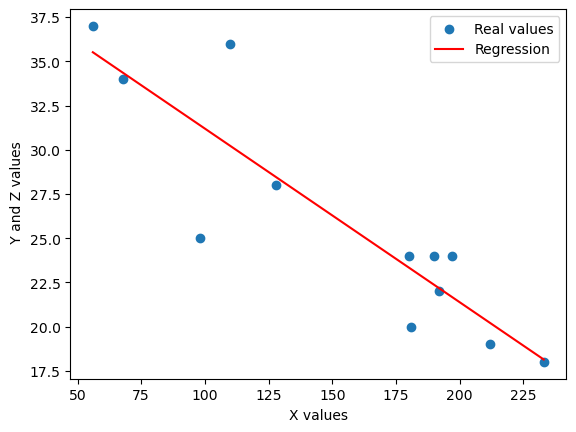

In [210]:
fig=plt.figure()
plt.scatter(df.X,df.Y,label='Real values')
plt.plot(df.X,Z,color='red',label='Regression')
plt.xlabel('X values')
plt.ylabel(' Y and Z values')
plt.legend(loc='upper right')


In [216]:
plt.savefig('exo2.png')

<Figure size 640x480 with 0 Axes>

---
## <a name="ex3">Exercise 3: Discrete isotropic total variation</a>

This exercise is devoted to the computation of the discrete isotropic total variation (TV) of an input matrix $\mathbf{X} = [\mathbf{x}_n]_{1 \leq n \leq N} \in\mathbb{C}^{M \times N}$, which is particularly useful in Bayesian inference (e.g., for inverse problems) to promote piece-wise smooth solutions. The TV is defined as

\begin{equation*}
    \text{TV}(\mathbf{X}) = \Vert D(\mathbf{X}) \Vert_{1,2} = \sum_{m=1}^M \sum_{n=1}^N \sqrt{[\mathbf{XD}_h]^2_{m,n} + [\mathbf{D}_v\mathbf{X}]^2_{m,n}},
\end{equation*}

where $[\mathbf{Z}]_{m,n}$ denotes the elements in position $(m,n)$ of the matrix $\mathbf{Z}$,

\begin{align*}
    D(X) &= (\mathbf{XD}_h, \mathbf{D}_v\mathbf{X}) \in \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \\
    %
    \mathbf{XD}_h &= [\mathbf{x}_2-\mathbf{x}_1, \dotsc, \mathbf{x}_N-\mathbf{x}_{N-1}, \mathbf{0}_M] \in \mathbb{C}^{M\times N} \\
    %
    \mathbf{D}_v\mathbf{X} &= [\tilde{\mathbf{x}}_2^T-\tilde{\mathbf{x}}^T_1, \dotsc, \tilde{\mathbf{x}}^T_M-\tilde{\mathbf{x}}^T_{M-1}, \mathbf{0}_N]^T \in \mathbb{C}^{M\times N},
\end{align*}

$\mathbf{x}_n \in \mathbb{C}^{M}$ is the $n$-th column of $\mathbf{X}$, and $\tilde{\mathbf{x}}_m \in \mathbb{C}^{1\times N}$ is the $m$-th row of $\mathbf{X}$. 
The linear operator $D: \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} $ is the discrete gradient operator. The adjoint of $D$, $D^*: \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N}$, is given by

\begin{align*}
    (\forall \mathbf{Y} = (\mathbf{Y}_h,\mathbf{Y}_v)), \quad D^*(\mathbf{Y}) &= \mathbf{Y}_h\mathbf{D}^*_h + \mathbf{D}^*_v\mathbf{Y}_v \\
    %
    \mathbf{Y}_h\mathbf{D}^*_h &= \big[-\mathbf{y}_{h,1},- [\mathbf{y}_{h,n}-\mathbf{y}_{h,n-1}]_{2 \leq n \leq N-1}, \mathbf{y}_{h, N-1} \big] \\
    %
    \mathbf{D}^*_v\mathbf{Y}_v &= \big[-\tilde{\mathbf{y}}_{v,1}^T,- [\tilde{\mathbf{y}}_{v,m}^T-\tilde{\mathbf{y}}^T_{v,m-1}]_{2 \leq m \leq M-1}, \tilde{\mathbf{y}}^T_{v, M-1} \big]^T
\end{align*}

where $\mathbf{y}_{h,n}$ is the $n$-th column of $\mathbf{Y}_h$, and $\tilde{\mathbf{x}}_{v,m}$ is the $m$-th row of $\mathbf{Y}_v$.

1\. Using `numpy`, implement a function `gradient2D` to compute the 2D discrete gradient operator $D$ applied to a matrix $\mathbf{X}\in\mathbb{C}^{M \times N}$ (no for loops!). Trigger an error message whenever the input array has more than 2 dimensions. If not clear from the implementation, add a few short comments to explain your code.

> Hint: 
> - to trigger an error, you can for instance use an `assert` statement, or raise an [exception (e.g., `AssertionError`)](https://docs.python.org/3/library/exceptions.html);
> - only a few operations are needed: computing vertical differences, horizontal differences, and possibly a concatenation of matrices into a single tensor (= n-dimensional array);
> - possibly useful functions: `np.diff`, `np.c_`, `np.r_` (or `np.concatenate`). 

**Answer**:

In [357]:
def gradient2D(X):
    
    assert(len(np.shape(X))<=2)
    XD=np.concatenate([np.array([list(X[:,i]-X[:,i-1])]).T for i in range(1,np.shape(X)[1])]+[np.zeros((np.shape(X)[0],1))],axis=1)
    DX=np.concatenate([np.array([list(X[i,:]-X[i-1,:])]) for i in range(1,np.shape(X)[0])]+[np.zeros((1,np.shape(X)[1]))],axis=0)
    return [XD,DX]

In [349]:
np.concatenate([np.array([[1,2,3]]).T,np.array([[1,2,3]]).T],axis=1)

array([[1, 1],
       [2, 2],
       [3, 3]])

2\. Implement a unit-test to validate the behaviour of the `gradient2D` function. For instance, you can check the format of the output, and test the result when the function is evaluated on a constant matrix (for both a square and a non-square input matrix). Run the unit-test from the present Jupyter notebook.

**Answer**:

In [353]:
X=np.array([[[1,1,1],[1,1,1],[1,1,1]] ,
            [[1,1,1],[1,1,1],[1,1,1]] ,
            [[1,1,1],[1,1,1],[1,1,1]]]) # A three dimensions array
gradient2D(X)

AssertionError: 

In [359]:
X=np.array([[1 , 2 , 3],
            [3 , 4 , 5]])
gradient2D(X)

[array([[1., 1., 0.],
        [1., 1., 0.]]),
 array([[2., 2., 2.],
        [0., 0., 0.]])]

In [361]:
X=np.array([[1 , 2 , 3],[3,4,5],[3,4,5]])
gradient2D(X)

[array([[1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.]]),
 array([[2., 2., 2.],
        [0., 0., 0.],
        [0., 0., 0.]])]

3\. Document the function `gradient2D` with an appropriate docstring (see Lab 1).

**Answer**:

In [266]:
def gradient2D(X):
    """This function calculates the discrete gradient operator for a given array
        input: array X
        output: list containing XD and DX corresponding to D operator applied on X
    """
    assert(len(np.shape(X))<=2)
    XD=np.concatenate([np.array([list(X[:,i]-X[:,i-1])]).T for i in range(1,np.shape(X)[1])]+[np.zeros((np.shape(X)[0],1))],axis=1)
    DX=np.concatenate([np.array([list(X[i,:]-X[i-1,:])]) for i in range(1,np.shape(X)[0])]+[np.zeros((1,np.shape(X)[1]))],axis=0)
    return [XD,DX]

4\. Using 1., define a function `tv` to compute $\text{TV}(\mathbf{X})$, $\mathbf{X}\in\mathbb{C}^{M \times N}$. Write a unit-test and document your function.

**Answer**:

In [367]:
def tv(X):
    """ This function computes the discrete isotropic total variation for a given array

        input: array X
        output: discrete isotropic total variation of X TV(X)
    
    """
    n,m=np.shape(X)
    XD,DX=gradient2D(X)
    TV=0
    for i in range(n):
        for j in range(m):
            TV+=np.sqrt(XD[i,j]**2+DX[i,j]**2)
    return TV

In [369]:
X=np.array([[1,2,1],[1,1,1]])
tv(X)

2.414213562373095

5\. Implement a function `gradient2D_adjoint` to compute $D^*(\mathbf{Y})$, the adjoint of the 2D discrete gradient operator $D$ applied to $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$. Add a few short comments to explain your code whenever appropriate.

**Answer**:

In [401]:
def gradient2D_adjoint(Y):
    """This function computes the adjoint of the 2D discrete gradient operator D
    input: Tuple of arrays(Yh,Yv)
    output: gradient adjoint 
    
    """
    Yh=Y[0]
    Yv=Y[1]
    columnsYhDh=[np.array([list(-Yh[:,0])])]+[np.array([list(Yh[:,k]-Yh[:,k+1])]) for k in range(np.shape(Yh)[1]-2)]+[np.array([list(Yh[:,np.shape(Yh)[1]-2])])]
    YhDh=np.concatenate(columnsYhDh,axis=0)
    YhDh=YhDh.T
    columnsDvYv=[np.array([list(-Yv[0,:])])] + [np.array([list(Yv[k,:]-Yv[k+1,:])]) for k in range(np.shape(Yv)[0]-2)]+[np.array([list(Yv[np.shape(Yv)[0]-2,:])])]
    DvYv=np.concatenate(columnsDvYv,axis=0)
    return YhDh+DvYv

In [403]:
Yh=np.array([[1,2,1],
             [1,1,1]])
Yv=np.array([[1,0,1],
             [0,1,1]])
Y=[Yh,Yv]
gradient2D_adjoint(Y)

array([[-2, -1,  1],
       [ 0,  0,  2]])

6\. Implement a unit-test to validate `gradient2D_adjoint`, e.g., by checking the size of the output from the function and verifying that `gradient2D_adjoint` is adjoint to `gradient2D`, i.e., for any $\mathbf{X}\in\mathbb{C}^{M \times N}$ and $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$:

\begin{equation}
    \forall \mathbf{X} \in \mathbb{C}^{M \times N}, \mathbf{Y} = (\mathbf{Y}_h, \mathbf{Y}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \;
    %
    \langle D(\mathbf{X}), \mathbf{Y} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{X}, D^*(\mathbf{Y}) \rangle_{\mathbb{C}^{M \times N}}, 
\end{equation}

where 

\begin{align}
    &\forall \mathbf{U}, \mathbf{V} \in \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N}} = \text{Tr}(\mathbf{U}^T \mathbf{V}) = \sum_{m=1}^M \sum_{n=1}^N u_{m,n}^* v_{m,n}, \\
    &\forall \mathbf{U} = (\mathbf{U}_h, \mathbf{U}_v), \mathbf{V} = (\mathbf{V}_h, \mathbf{V}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{U}_h, \mathbf{V}_h \rangle_{\mathbb{C}^{M \times N}} + \langle \mathbf{U}_v, \mathbf{V}_v \rangle_{\mathbb{C}^{M \times N}}.
\end{align}

> Hint: to verify `gradient2D_adjoint` is the adjoint of `gradient2D`, evaluate the scalar products above for randomly drawn matrices. Set the random generator to a known state for reproducibility (see [Exercise 1](#ex1)).
> `np.conj` is useful.

**Answer**:

In [409]:
def scalarProd_Cmn(U,V):
    """
        This function computes the scalar product in C^(M x N) 
        Input: Two array U and V
        Output: The result of the scalar product of the two arrays
    """
    return np.trace(np.matmul(U.T,V))

def scalarProd_CmnXCmn(U,V):
    """
        This function computes the scalar product in C^(M x N) x C^(M x N)
        Input: Two a tuples of arrays of C^(M x N)
        output: corresponding scalar product
    """
    return scalarProd_Cmn(U[0],V[0])+scalarProd_Cmn(U[1],V[1])

In [413]:
Yh=np.array([[1,2,1],
             [1,1,1]])
Yv=np.array([[1,0,1],
             [0,1,1]])
Y=[Yh,Yv]
X=np.array([[1 , 2 , 3],[3,4,5]])
p1=scalarProd_CmnXCmn(gradient2D(X),Y)
p2=scalarProd_Cmn(X,gradient2D_adjoint(Y))

In [415]:
p1-p2

0.0

[Bonus, **optional**]. Generalize the `gradient2D` to any number of dimensions ($\mathbf{X} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}$), i.e., by returning tensors obtained by computing differences along each of its dimensions.
> Hint: 
> - you may use a loops here, and/or list comprehension. Using slice objects (see [np.s_](https://numpy.org/doc/stable/reference/generated/numpy.s_.html?highlight=s_#numpy.s_) and [this page](https://stackoverflow.com/questions/24432209/python-index-an-array-using-the-colon-operator-in-an-arbitrary-dimension)) can be an interesting option.
>
> - the definition of the scalar product above can be extended to the case of tensors as follows:
\begin{equation}
    \mathbf{U}, \mathbf{V} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}} =  \sum_{n_1 = 1}^{N_1}  \sum_{n_2 = 1}^{N_2} \dotsc \sum_{n_p = 1}^{N_p} u_{n_1, n_2, \dotsc, n_p}^* v_{n_1, n_2, \dotsc, n_p}   
\end{equation}

**Answer**:

In [ ]:
def gradient_nD(X):
    

## Reference

```bibtex
@article{condat:hal-01309685,
  TITLE = {{Discrete Total Variation: New Definition and Minimization}},
  AUTHOR = {Condat, Laurent},
  URL = {https://hal.archives-ouvertes.fr/hal-01309685},
  JOURNAL = {{SIAM Journal on Imaging Sciences}},
  PUBLISHER = {{Society for Industrial and Applied Mathematics}},
  VOLUME = {10},
  NUMBER = {3},
  PAGES = {1258--1290},
  YEAR = {2017},
  MONTH = Aug,
  DOI = {10.1137/16M1075247},
  KEYWORDS = { variational image processing ; total variation ;  finite-difference schemes ;  coarea formula},
  PDF = {https://hal.archives-ouvertes.fr/hal-01309685v3/file/Condat-newTV.pdf},
  HAL_ID = {hal-01309685},
  HAL_VERSION = {v3},
}
```
